## A Machine Learning Approach to Cardiotocography Interpretation
### Authors: Holly Figueroa & Karlie Schwartzwald
### Milestone 4 - Modeling/Finalizing Results

In [1]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier

In [2]:
# Load data and view
fetal_health = pd.read_csv('fetal_health.csv')
fetal_health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
fetal_health['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [4]:
# Remove highly correlated features, leaving hist mean
fetal_health = fetal_health.drop(['histogram_median', 'histogram_mode'], axis = 1)

In [5]:
# Separate features from target
X = fetal_health.drop(['fetal_health'], axis = 1)
y = fetal_health['fetal_health']

In [ ]:
# ![image.png](attachment:image.png)
# ![image-2.png](attachment:image-2.png)
# ![image-3.png](attachment:image-3.png)
# ![image-4.png](attachment:image-4.png)

In [151]:
# train test split data using stratify to preserve the class ratios
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 5)
# Check shape
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1700, 19) (1700,) (426, 19) (426,)


In [152]:
# get target class proportions of the training set
train_y.value_counts()

1.0    1323
2.0     236
3.0     141
Name: fetal_health, dtype: int64

In [153]:
test_y.value_counts()

1.0    332
2.0     59
3.0     35
Name: fetal_health, dtype: int64

In [154]:
# check null accuracy score
null_accuracy = (1323/(236+141+1323))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7782


### MLP Nueral Network
#### Stratified Y Test Split, Oversampling, & Gridsearch

In [155]:
# Random Oversampling
over_sampler = RandomOverSampler(sampling_strategy = 'auto')
ros_X, ros_y = over_sampler.fit_resample(train_X,train_y)

In [156]:
# Check counts/oversampling results
ros_y.value_counts()

2.0    1323
1.0    1323
3.0    1323
Name: fetal_health, dtype: int64

In [157]:
# Encode classes so they are 0-2 instead of 1-3
# Now training y and test_y will be label encoded and oversampled
enc = preprocessing.LabelEncoder()
ros_y = enc.fit_transform(ros_y)
test_y = enc.transform(test_y)

In [158]:
# Create scaler
scaler = StandardScaler()
# Create Model Instance for gridsearching parameters
mlp = MLPClassifier()
# Create pipeline
pipe = Pipeline(steps=[('scaler', scaler ), ('mlpc', mlp)])

### ***Grid search is commented out to prevent lengthy- rerunning***

In [159]:
# mlp.get_params()

In [160]:
# # Define gridspace
# param_grid= [{'mlpc__activation': ['relu','tanh'],
#              'mlpc__alpha': [0.0025, 0.05, 0.5 ],
#              'mlpc__hidden_layer_sizes': [(12,6)],
#              'mlpc__max_iter': [2000],
#              'mlpc__solver': ['adam','lbfgs'],
#              'mlpc__batch_size': [20,30,50],
#              'mlpc__learning_rate':['invscaling','adaptive']
#              }]

In [161]:
# # Run a new gridsearch with new search_space
# grid_mlp = GridSearchCV(pipe, param_grid, n_jobs= -1, cv = 2, verbose = 0)

In [162]:
# # Fit grid search
# grid_mlp.fit(ros_X,ros_y)

In [163]:
# grid_mlp.best_params_

In [164]:
# print('Best score: ', grid_mlp.best_score_)
# print('Test Accuracy: ', grid_mlp.score(test_X, test_y))

In [165]:
# Create MLP model with chosen params
best_mlp = MLPClassifier(
                        activation= 'tanh', 
                        alpha = 0.001, 
                        hidden_layer_sizes = (12,6), 
                        max_iter = 2000, 
                        solver = 'lbfgs',
                        random_state = 12,
                        learning_rate = 'adaptive'
                        )

In [166]:
# Update pipeline
pipe = Pipeline(steps=[('scaler', scaler ), ('mlpc', best_mlp)])

# Fit to features
pipe.fit(ros_X, ros_y)


# Get predictions
pred_y = pipe.predict(test_X)

In [167]:
accuracy_score(test_y, pred_y)

0.903755868544601

In [168]:
# Create confusion matrix
cm = confusion_matrix(test_y, pred_y)

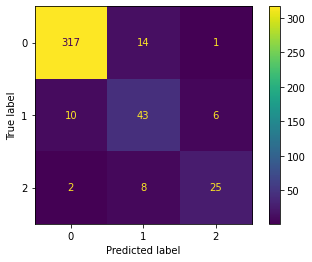

In [169]:
# use display matrix function to heatmap prediction/true cases
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [170]:
def get_tpr_fnr_fpr_tnr(cm):
    """
    This function returns class-wise TPR, FNR, FPR & TNR
    [[cm]]: a 2-D array of a multiclass confusion matrix
            where horizontal axes represent actual classes
            and vertical axes represent predicted classes
    {output}: a dictionary of class-wise accuracy parameters
    """
    dict_metric = dict()
    n = len(cm[0])
    row_sums = cm.sum(axis=1)
    col_sums = cm.sum(axis=0)
    array_sum = sum(sum(cm))
    #initialize a blank nested dictionary
    for i in range(1, n+1):
        keys = str(i)
        dict_metric[keys] = {"TPR":0, "FNR":0, "FPR":0, "TNR":0}
    # calculate and store class-wise TPR, FNR, FPR, TNR
    for i in range(n):
        for j in range(n):
            if i == j:
                keys = str(i+1)
                tp = cm[i, j]
                fn = row_sums[i] - cm[i, j]
                dict_metric[keys]["TPR"] = tp / (tp + fn)
                dict_metric[keys]["FNR"] = fn / (tp + fn)
                fp = col_sums[i] - cm[i, j]
                tn = array_sum - tp - fn - fp
                dict_metric[keys]["FPR"] = fp / (fp + tn)
                dict_metric[keys]["TNR"] = tn / (fp + tn)
    return dict_metric

In [171]:
rates_df = pd.DataFrame(get_tpr_fnr_fpr_tnr(cm)).transpose()
rates_df

,TPR,FNR,FPR,TNR
1,0.954819,0.045181,0.127660,0.872340
2,0.728814,0.271186,0.059946,0.940054
3,0.714286,0.285714,0.017903,0.982097


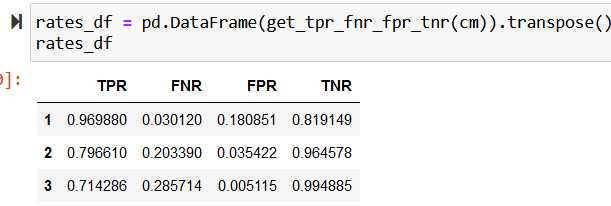

### Naive Bayes 
#### With Bagging and then without

In [25]:
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB

In [26]:
# train test split data using stratify to preserve the class ratios
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 5)
# Check shape
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1700, 19) (1700,) (426, 19) (426,)


In [27]:

# Train scaler and encorder on training sets
minmax = MinMaxScaler().fit(train_X)
enc2 = preprocessing.LabelEncoder().fit(train_y)

# Transform training sets
mm_train_X = minmax.transform(train_X)
enc2_train_y = enc2.transform(train_y)

# Transform test sets
mm_test_X = minmax.transform(test_X)
enc2_test_y = enc2.transform(test_y)

#### Testing models for both Complement NB (cnb) and Gaussian NB (gnb)

In [28]:
cnb = ComplementNB(alpha = 35)

gnb = GaussianNB( var_smoothing = .6,)

In [29]:
cbag_model = BaggingClassifier(
    base_estimator = cnb,
    bootstrap = False,
    n_estimators = 101,
    max_samples =0.6,
    random_state = 2)

cbag_model.fit(mm_train_X, enc2_train_y)


BaggingClassifier(base_estimator=ComplementNB(alpha=35), bootstrap=False,
                  max_samples=0.6, n_estimators=101, random_state=2)

In [30]:
gbag_model = BaggingClassifier(
    base_estimator = gnb,
    bootstrap = False,
    n_estimators = 101,
    max_samples =0.6,
    random_state = 2)

gbag_model.fit(mm_train_X, enc2_train_y)


BaggingClassifier(base_estimator=GaussianNB(var_smoothing=0.6), bootstrap=False,
                  max_samples=0.6, n_estimators=101, random_state=2)

In [31]:
# Get predictions
cpred_y = cbag_model.predict(mm_test_X)
gpred_y = gbag_model.predict(mm_test_X)

cbag_accuracy = accuracy_score(enc2_test_y, cpred_y)
gbag_accuracy = accuracy_score(enc2_test_y, gpred_y)

print('ComplementNB Accuracy:   ', cbag_accuracy)
print('GaussianNB Accuracy:   ', gbag_accuracy)
      

ComplementNB Accuracy:    0.8544600938967136
GaussianNB Accuracy:    0.8427230046948356


In [32]:
# Create confusion matrix
competent_cm = confusion_matrix(enc2_test_y, cpred_y)
gaussian_cm = confusion_matrix(enc2_test_y, gpred_y)

#### Confusion matrix for Complement NB - using esemble bagging

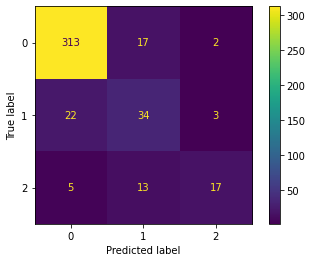

In [33]:
# use display matrix function to heatmap prediction/true cases
disp = ConfusionMatrixDisplay(confusion_matrix=competent_cm)
disp.plot()

plt.show()

#### Confusion matrix for Guassian NB - using esemble bagging

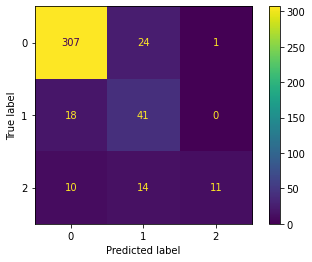

In [34]:
# use display matrix function to heatmap prediction/true cases
disp = ConfusionMatrixDisplay(confusion_matrix=gaussian_cm)
disp.plot()

plt.show()

### Running naive bayes model without bagging

In [35]:
# Train model- same guassian model (same params)
cnb.fit(mm_train_X, enc2_train_y)
gnb.fit(mm_train_X, enc2_train_y)


GaussianNB(var_smoothing=0.6)

In [36]:
# get predictions for both models
cpred_y = cnb.predict(mm_test_X)
gpred_y = gnb.predict(mm_test_X)

In [37]:
print("Complement NB Accuracy:   ",accuracy_score(enc2_test_y, cpred_y))
print("Gaussian NB Accuracy:   ",accuracy_score(enc2_test_y, gpred_y))

Complement NB Accuracy:    0.8333333333333334
Gaussian NB Accuracy:    0.8450704225352113


In [38]:
# Create matrices for both model prediction results
c_cm = confusion_matrix(enc2_test_y, cpred_y)
g_cm = confusion_matrix(enc2_test_y, gpred_y)

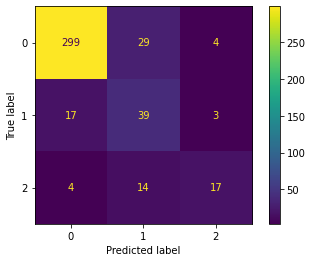

In [39]:
# Complemet CM Results
#use display matrix function to heatmap prediction/true cases
disp = ConfusionMatrixDisplay(confusion_matrix=c_cm)
disp.plot()

plt.show()

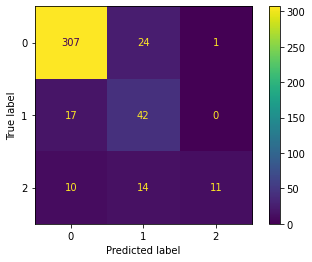

In [40]:
# Guassian CM Results
# use display matrix function to heatmap prediction/true cases
disp = ConfusionMatrixDisplay(confusion_matrix=g_cm)
disp.plot()

plt.show()